## LeNET Implementation

##### http://dia.fi.upm.es/~lbaumela/PracRF11/MNIST.html


In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import LambdaLR

import numpy as np
import matplotlib.pyplot as plt
import random
import gzip

In [63]:
def load_images(filename):
    with gzip.open(filename, 'rb') as f:
        # Skip magic number and metadata
        f.read(16)
        # Read image data
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(-1, 28, 28)

def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        # Skip magic number and metadata
        f.read(8)
        # Read label data
        return np.frombuffer(f.read(), dtype=np.uint8)

# Load training data
train_images = load_images('/content/drive/MyDrive/Rp_imp/LeNet/train-images-idx3-ubyte.gz')
train_labels = load_labels('/content/drive/MyDrive/Rp_imp/LeNet/train-labels-idx1-ubyte.gz')

# Load test data
test_images = load_images('/content/drive/MyDrive/Rp_imp/LeNet/t10k-images-idx3-ubyte.gz')
test_labels = load_labels('/content/drive/MyDrive/Rp_imp/LeNet/t10k-labels-idx1-ubyte.gz')

In [64]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


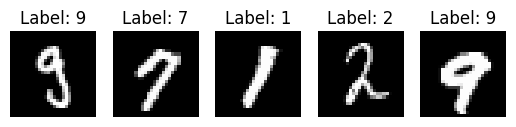

In [66]:
def plot_random_digits(images, labels, num_digits=5):
    # Get random indices
    random_indices = random.sample(range(len(images)), num_digits)

    # Plot the random digits
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_digits, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f'Label: {labels[idx]}')
        plt.axis('off')

    plt.show()

# Example usage
plot_random_digits(train_images, train_labels)

### Loading the Data

In [67]:
# converting ndarrays to Tensors
X_train = torch.Tensor(train_images)
X_test = torch.Tensor(test_images)

y_train = torch.Tensor(train_labels)
y_test = torch.Tensor(test_labels)

print(X_train.shape)

torch.Size([60000, 28, 28])


In [78]:
input_size = 784
num_classes = 10
batch_size = 100
num_epochs = 100

In [79]:
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

### Model

In [80]:
class LeNet5(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LeNet5, self).__init__()

        self.c1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)
        self.c2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.c3 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.c4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.c5 = nn.Linear(4*4*16, 120)
        self.c6 = nn.Linear(120, 84)
        self.op = nn.Linear(84, num_classes)

    def forward(self, X):
        X = F.tanh(self.c1(X))
        X = self.c2(X)
        X = F.tanh(self.c3(X))
        X = self.c4(X)
        X = X.view(-1, 16 * 4 * 4)
        X = F.tanh(self.c5(X))
        X = F.tanh(self.c6(X))
        X = self.op(X)
        return X

model = LeNet5(28*28, 10)

In [81]:
def get_lr(epoch):
    print(epoch)
    if epoch <= 2:
        return 0.0005
    elif epoch <= 5:
        return 0.0002
    elif epoch <= 9:
        return 0.00005
    else:
        return 0.000001

In [82]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=get_lr(epoch))

49


In [83]:
n_total_steps = len(train_loader)
device = 'cpu'
train_losses = []

for epoch in range(num_epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr=get_lr(epoch))
    for i, (images, labels) in enumerate(train_loader):

        images = torch.reshape(images, (100, 1, 28, 28))
        labels = labels.long()

        # forward pass
        output = model(images)
        loss = criterion(output, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        if (i+1)%100==0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

0
epoch 1/100, step 100/600, loss = 0.5627
epoch 1/100, step 200/600, loss = 0.1597
epoch 1/100, step 300/600, loss = 0.1397
epoch 1/100, step 400/600, loss = 0.1197
epoch 1/100, step 500/600, loss = 0.1017
epoch 1/100, step 600/600, loss = 0.2193
1
epoch 2/100, step 100/600, loss = 0.0466
epoch 2/100, step 200/600, loss = 0.0618
epoch 2/100, step 300/600, loss = 0.0961
epoch 2/100, step 400/600, loss = 0.1023
epoch 2/100, step 500/600, loss = 0.0569
epoch 2/100, step 600/600, loss = 0.0713
2
epoch 3/100, step 100/600, loss = 0.1002
epoch 3/100, step 200/600, loss = 0.0872
epoch 3/100, step 300/600, loss = 0.0635
epoch 3/100, step 400/600, loss = 0.0352
epoch 3/100, step 500/600, loss = 0.1492
epoch 3/100, step 600/600, loss = 0.0876
3
epoch 4/100, step 100/600, loss = 0.0362
epoch 4/100, step 200/600, loss = 0.0276
epoch 4/100, step 300/600, loss = 0.0146
epoch 4/100, step 400/600, loss = 0.0985
epoch 4/100, step 500/600, loss = 0.0281
epoch 4/100, step 600/600, loss = 0.0409
4
epoch 

In [84]:
accuracies = []

with torch.no_grad():
    n_samples = 0
    n_correct = 0
    for images, labels in test_loader:
        images = torch.reshape(images, (100, 1, 28, 28))
        labels = labels.long()
        outputs = model(images)
        # value, index
        _, pred = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (pred==labels).sum().item()

        accuracy = 100 * n_correct / n_samples
        accuracies.append(accuracy)

acc = (n_correct*100)/n_samples
print(f'accuracy: {acc}')

accuracy: 98.62


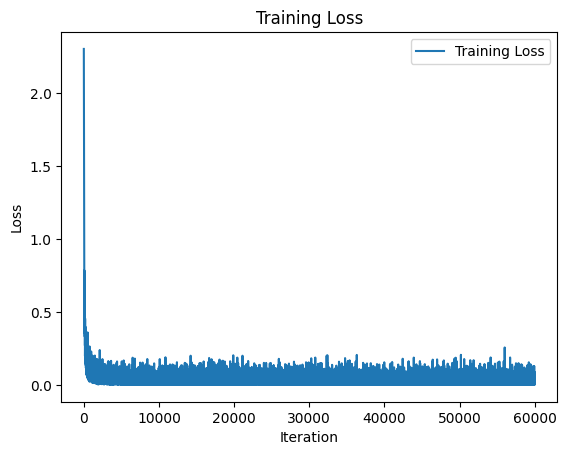

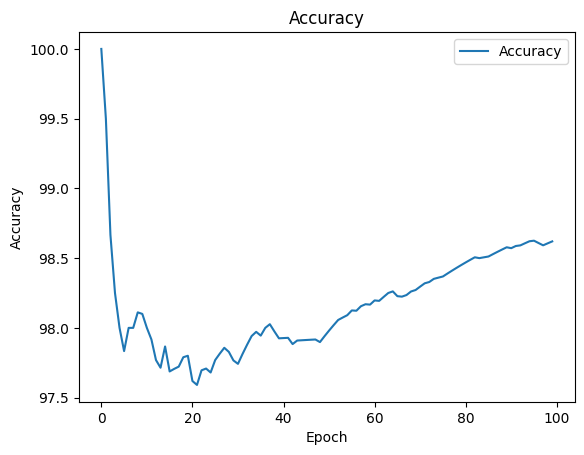

In [85]:
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

print()

# Plotting accuracy
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [77]:
# lr=0.0001 -> 98.54
# lr=0.0005 -> 98.82
# lr=0.00001 -> 98.69

# lr=0.0001 -> 98.59
# lr=0.0005 -> 98.83
# lr=0.00001 -> 96.96
# lr=0.000001 -> 68.09

# hybrid method - 20 epochs - 98.53
# hybrid method - 50 epochs -
